In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import scipy as sp
import sklearn as sk # data mining tools
import matplotlib.pylab as plt # plotting
import seaborn as sns # advanced plotting
import ast
import collections
import re 
import six
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_colwidth = 100
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('ted_main_dummy_columns.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 47 columns):
comments               2550 non-null int64
description            2550 non-null object
duration               2550 non-null int64
event                  2550 non-null object
film_date              2550 non-null int64
languages              2550 non-null int64
main_speaker           2550 non-null object
name                   2550 non-null object
num_speaker            2550 non-null int64
published_date         2550 non-null int64
ratings                2550 non-null object
related_talks          2550 non-null object
speaker_occupation     2550 non-null object
tags                   2550 non-null object
title                  2550 non-null object
url                    2550 non-null object
views                  2550 non-null int64
Literature             2550 non-null int64
Art                    2550 non-null int64
Economy_Politics       2550 non-null int64
Medicine               

In [4]:
df['question']=0
for i in range (0,len(df)):
    if (("?") in df.loc[(i,'title')]):
        df.loc[(i,'question')] = 1
    else:
        df.loc[(i,'question')] = 0

In [4]:
df['how']=0
for i in range (0,len(df)):
    if (("how") in df.loc[(i,'title')]):
        df.loc[(i,'how')] = 1
    else:
        df.loc[(i,'how')] = 0
for i in range (0,len(df)):
    if (("How") in df.loc[(i,'title')]):
        df.loc[(i,'how')] = 1
    else:
        df.loc[(i,'how')] = 0

In [ ]:
df.to_csv('ted_main_question_how_added.csv')

In [7]:
temp = df.groupby(['question','popularity_class']).size()
temp2=temp.groupby(level=[0]).apply(lambda g : g*100/g.sum())
print (temp2)


question  popularity_class
0         0                   34.415030
          1                   33.347566
          2                   32.237404
1         0                   21.153846
          1                   33.173077
          2                   45.673077
dtype: float64


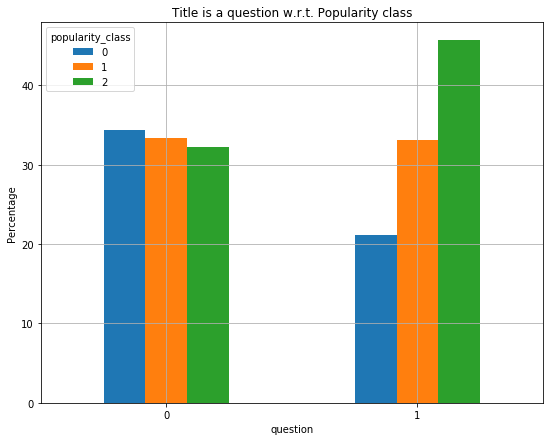

In [12]:
myPlot = temp2.unstack(1).plot(kind='bar',stacked=False, figsize=(9,7),grid =True,rot=0)
plt.title("Title is a question w.r.t. Popularity class")
plt.ylabel('Percentage')
plt.show()

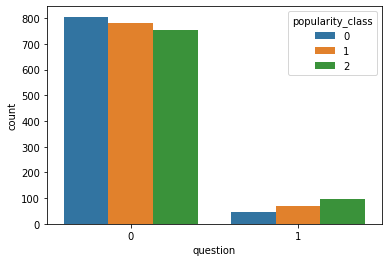

In [9]:

sns.countplot(x='question', hue="popularity_class", data=df);

In [13]:
temp = df.groupby(['how','popularity_class']).size()
temp2=temp.groupby(level=[0]).apply(lambda g : g*100/g.sum())
print (temp2)


how  popularity_class
0    0                   32.946429
     1                   33.214286
     2                   33.839286
1    0                   36.129032
     1                   34.193548
     2                   29.677419
dtype: float64


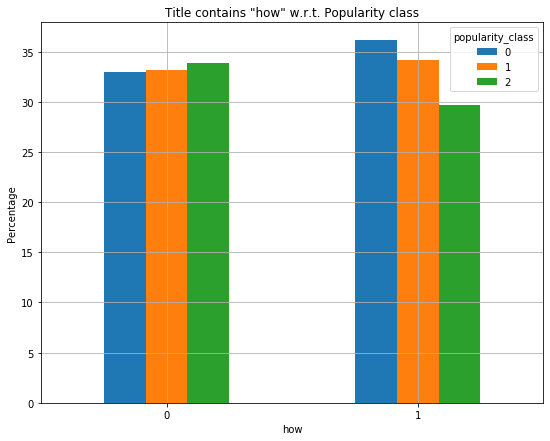

In [14]:
myPlot = temp2.unstack(1).plot(kind='bar',stacked=False, figsize=(9,7),grid =True,rot=0)
plt.title("Title contains \"how\" w.r.t. Popularity class")
plt.ylabel('Percentage')
plt.show()

In [ ]:
sns.countplot(x='how', hue="popularity_class", data=df);

## Treating tags vs popularity

In [5]:
tag_dict={}
#explore column by index
for i in range (0,2550):
    #transform list of tags in actual list
    lista=eval(df.loc[i]['tags'])
    #explore every tag in the list
    for t in lista:
        #check whether the tag exist in the dict
        if not t in tag_dict:
        #put 0 in both three columns of pop
            tag_dict[t]=[0,0,0]
        #count +1 the pop
        tag_dict[t][(df.loc[i]['popularity_class'])]+=1
    

In [6]:
df_tags=pd.DataFrame.from_dict(tag_dict, orient='index')

In [7]:
#since first column doesn't have name, add it later
tags=list(tag_dict.keys())
df_tags.insert(0, "tags",tags,  True) 

In [10]:
df_tags.head(10)

,tags,0,1,2
culture,culture,108,134,244
technology,technology,250,263,214
science,science,201,179,187
global issues,global issues,174,173,154
business,business,85,123,140
TEDx,TEDx,176,138,136
design,design,163,151,104
entertainment,entertainment,110,86,103
brain,brain,24,42,92
psychology,psychology,15,25,82


In [9]:
#to order the table --> do again line before
df_tags=df_tags.sort_values(by=[2],ascending=False)